In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, json
import warnings

import numpy as np

#sys.path.insert(0, '/mnt/d/projects/bassline_transcription') 
sys.path.insert(0, '/scratch/users/udemir15/ELEC491/bassline_transcription')

import plotting as plot
from bassline_transcriber import transcription
from utilities import *
from signal_processing import *

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Initialization

## Directories

In [5]:
directories = get_directories('../data/directories.json')
track_dicts_name = "TechHouse_total_track_dicts.json"
#track_dicts_name = "TechHouse_track_dicts.json"

scales, track_dicts, track_titles = read_metadata(directories['extraction'], track_dicts_name)

#output_dir = os.path.join('..','data','transcription_test')
#clip_dir = os.path.join(output_dir,'audio_clips')
#metadata_dir = os.path.join(output_dir,'metadata')

directories = get_directories(os.path.join(output_dir,'directories.json'))

scales, track_dicts, track_titles = read_metadata(directories['extraction'])

# Listening and Waveform Inspection

Select a track to work with

Green Velvet & Patrick Topping - Voicemail
BPM: 124.0

		Green Velvet & Patrick Topping - Voicemail

Chorus

Fs = 44100, x.shape = (341335,), x.dtype = float32


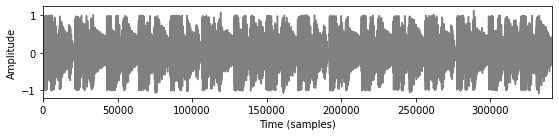

Bassline

Fs = 44100, x.shape = (341335,), x.dtype = float64


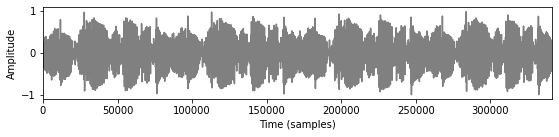

In [29]:
#title = track_titles[np.random.randint(len(track_titles))]

title = track_titles[10299]
BPM = float(track_dicts[title]['BPM'])
beat_length = 60/BPM
print('{}\nBPM: {}\n'.format(title, BPM))

beat_positions = get_chorus_beat_positions(title, directories)
quarter_beat_positions = get_quarter_beat_positions(beat_positions)
    
track_scale = get_track_scale(title, track_dicts, scales)

fs = 44100
chorus, bassline = load_chorus_and_bassline(title, directories) # read the chorus and the bassline

inspect_audio_outputs(title, directories)

beat_length = 60/BPM
print('Beat length: {}'.format(beat_length))

track_length = len(chorus)/fs
print('Track length: {}'.format(track_length))

print(track_length/beat_length)

frame_factor = 8
frame_size = beat_length/frame_factor
window_size = frame_size/2
hop_size = frame_size/4

pYIN_sizes_sec = [frame_size, window_size, hop_size]
pYIN_sizes = [int(x*fs) for x in  pYIN_sizes_sec]
print('\nframe_size: {}, window_size: {}, hop_size: {}'.format(*pYIN_sizes))
print('in sec: {}, {}, {}'.format(*pYIN_sizes_sec))

# Transcription Inspection

Load all the system outputs

title = track_titles[320]

In [30]:
M=1

print(title)

F0_estimate = load_F0_estimate(title, directories)

pitch_track = load_pitch_track(title, directories)

quantized_pitch_track = load_quantized_pitch_track(title, directories)

notes, unk_notes = transcription.extract_note_dicts(quantized_pitch_track, track_scale, epsilon=2)

#bassline_midi = load_bassline_midi_array(title, directories, M)

symbolic_representation = load_symbolic_representation(title, directories, M)

midi_number = transcription.replace_sustain(symbolic_representation)

Green Velvet & Patrick Topping - Voicemail


In [49]:
track_titles.index('Amine Edge & DANCE - Get Busy')

246

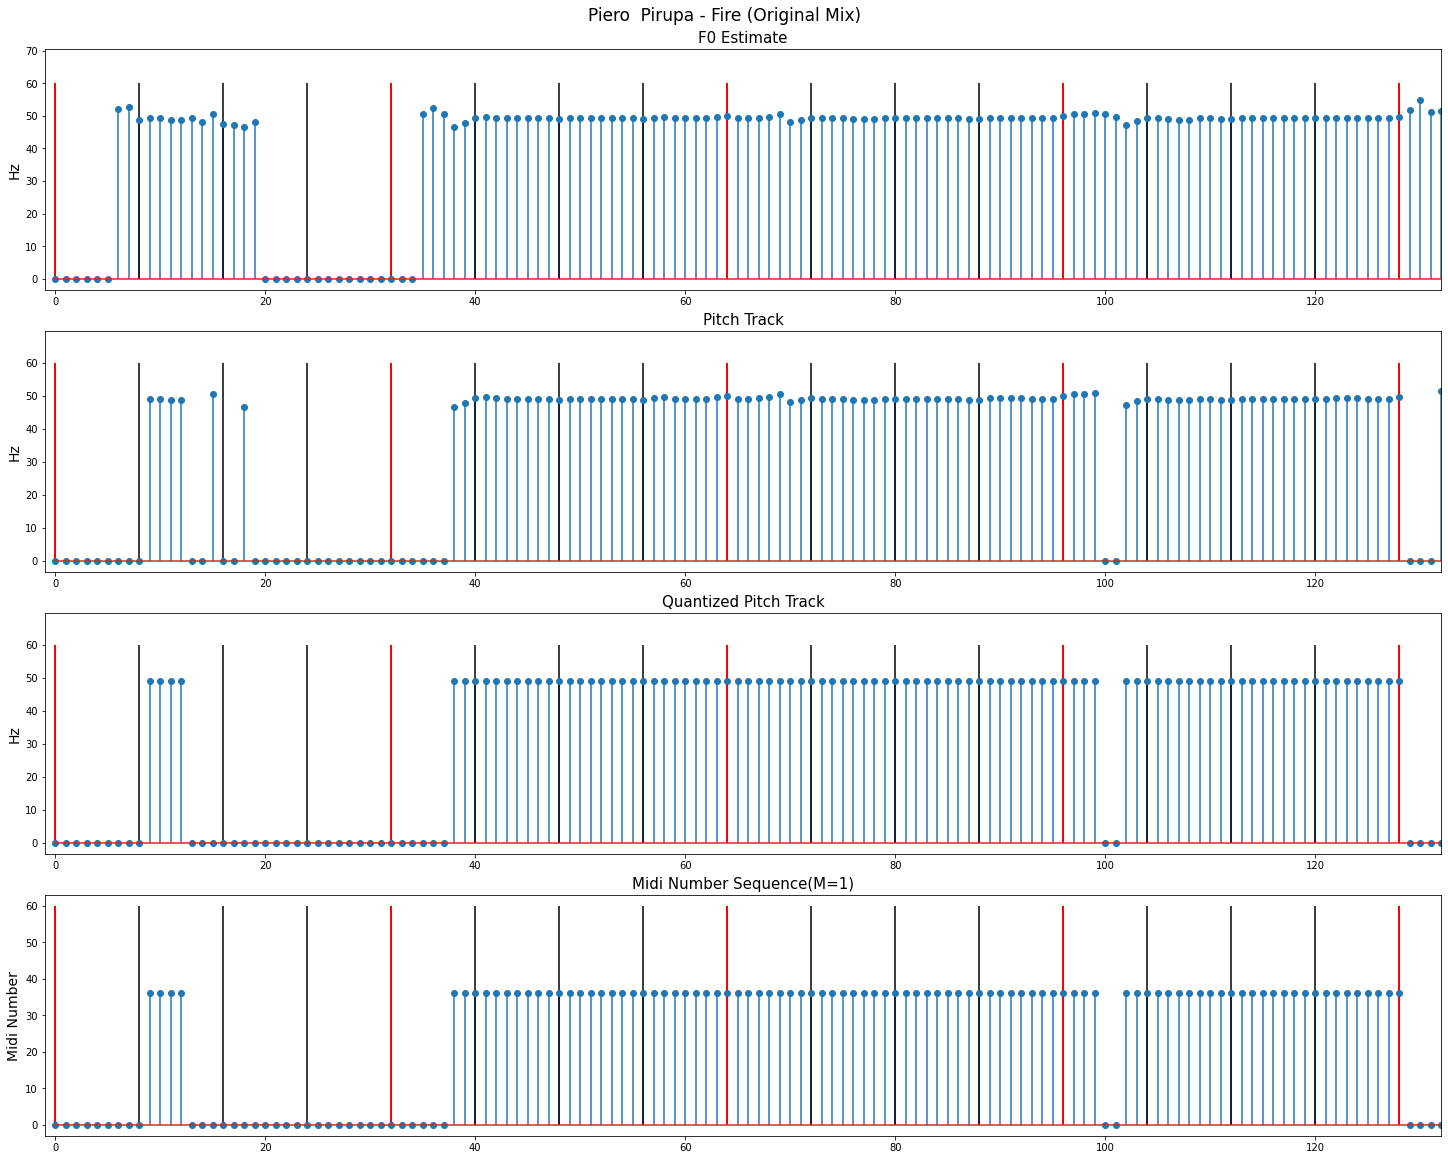

In [13]:
plot.F0_related_stem(title, F0_estimate, pitch_track, quantized_pitch_track, midi_number, M)

In [ ]:
plot.chorus_bassline_stem(title, chorus, bassline, beat_positions, 4, fs)

In [ ]:
print_midi_array(bassline_midi)

In [74]:
print_beat_matrix(symbolic_representation, M)

SIL: 1, SUS: 26

        Bar 0            Bar 1        
Beat 0: [ 0 36  0 36]   [100  36   0  36]
Beat 1: [100 100 100   0]   [100 100 100 100]
Beat 2: [ 39   0  39 100]   [ 39   0  39 100]
Beat 3: [ 43 100   0  39]   [ 43 100   0  43]

        Bar 2            Bar 3        
Beat 0: [100  36   0  36]   [100  36   0  36]
Beat 1: [100 100 100 100]   [100 100 100  39]
Beat 2: [ 39   0  39 100]   [100  37  43 100]
Beat 3: [ 43   0 100  39]   [100   0 100  43]


# Spectrogram Calculation

Calculate the spectrograms of the chorus and the bassline here.

You can also apply post filtering on the spectrogram.

In [31]:
center=True
n_fft = 4096*8

spectrogram_beat_factor = 8
win_length = int((beat_length/spectrogram_beat_factor)*fs) 
hop_length = int(win_length/4) 

bassline_spectrogram = extract_dB_spectrogram(bassline, n_fft, win_length, hop_length, center=center)

# Plots

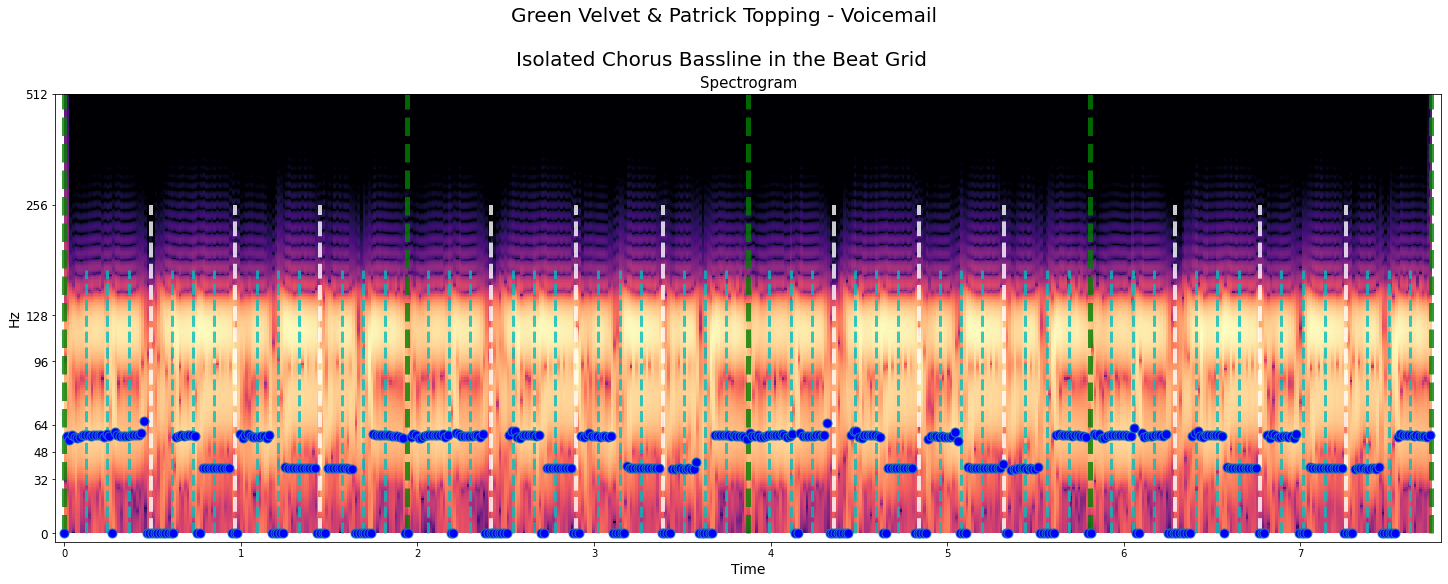

In [32]:
plot.spectrogram(title, directories, bassline_spectrogram, fs, hop_length, F0_estimate)

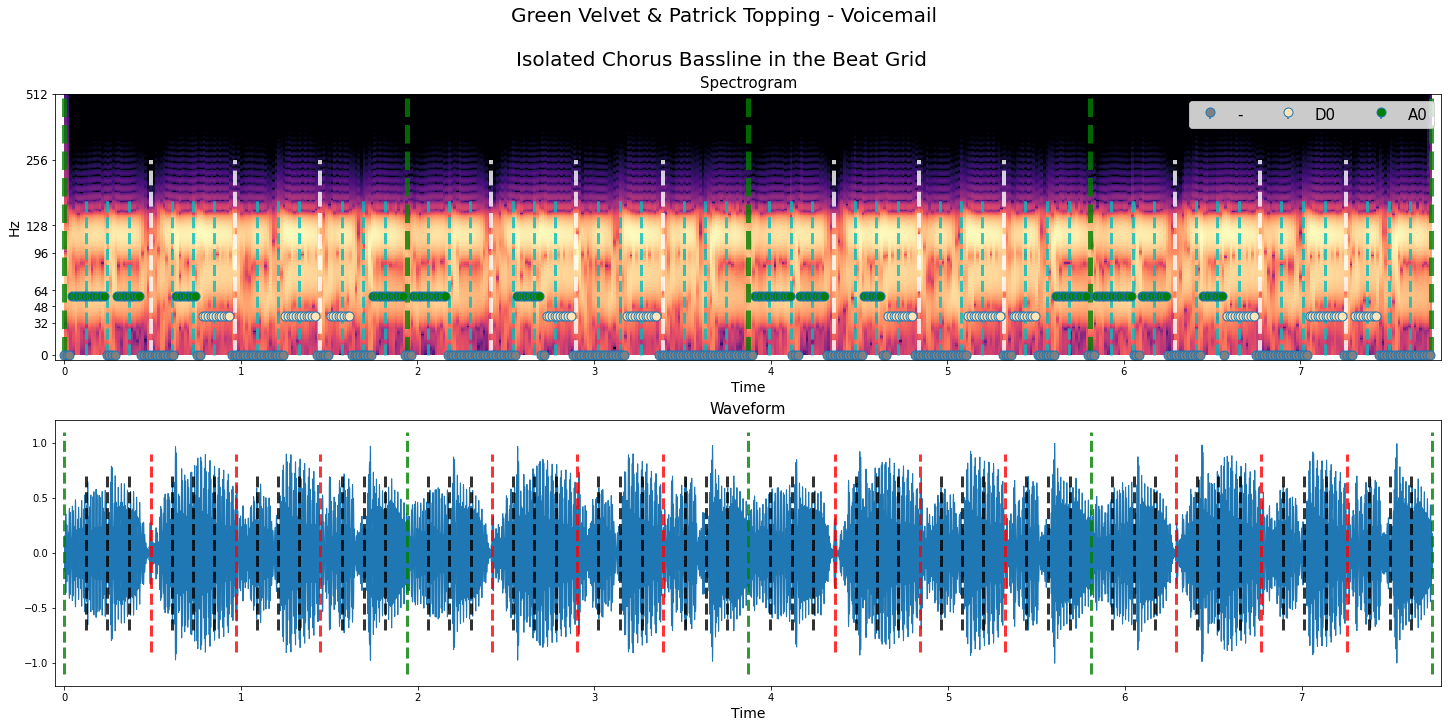

In [34]:
plot.waveform_and_note_spectrogram(title, directories,
                                   bassline, bassline_spectrogram,
                                   fs, hop_length,
                                   notes, unk_notes,
                                   save=False)

In [ ]:
plot.note_spectrogram(title, directories,
                      bassline_spectrogram,
                      fs, hop_length,
                      notes, unk_notes)

In [ ]:
print_plot_play(chorus, fs, title)

In [ ]:
plot.note_comparison_spectrogram(title, directories,
                                 bassline_spectrogram,
                                 fs, hop_length,
                                 F0_estimate, bassline_notes,
                                 unk_bassline_notes,
                                 save=False, plot_title='')